In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd

import numpy as np




init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'continuidad'
titulo = 'Continuidad'
curso = '1BC'


x,y = symbols('x, y', real=True)

import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')
style.use('seaborn-whitegrid')


%matplotlib inline


IPython console for SymPy 1.4 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
from sympy.calculus.util import continuous_domain

In [3]:
def trozos(f):
    # Función que devuelve el extremo superior de los tramos, los límites laterales, y el valor de la función
    sol = []
    for i,s  in enumerate(f.args):
        if(i<len(f.args)-1):
            extremo = f.args[i][1].as_set().sup
            #display(extremo)
            #display(s)
            #display(limit(f.args[i][0],x,extremo, dir='-'))
            #display(limit(f.args[i][0],x,extremo, dir='+'))
            #display(f.subs(x,extremo))
            sol.append((extremo, limit(f.args[i][0],x,extremo, dir='-'), limit(f.args[i+1][0],x,extremo, dir='+'),f.subs(x,extremo)))        
    return sol        
            

In [4]:
def estudio(f) :
    # Estudio en una función a trozos
    
    set = S.Reals
    conj_singular = S.EmptySet
    for j, t in enumerate(f.args) :
        #display(singularities(t[0],x))
        #conj_singular = Union(conj_singular,singularities(t[0],x))
        #display(Union(conj_singular,singularities(t[0],x)))
        #conj_singular = Union(conj_singular,Complement(S.Reals,continuous_domain(t[0],x,S.Reals)))
        #conj_singular = Union(conj_singular,Intersection(t[1].as_set(),Complement(S.Reals,continuous_domain(t[0],x,S.Reals))))
        set2 = Intersection(set,t[1].as_set())
        conj_singular = Union(conj_singular,Intersection(set2,Complement(S.Reals,continuous_domain(t[0],x,S.Reals))))
        set = Complement(S.Reals,t[1].as_set())
        
    sol = r"Singularidades de las expresiones analíticas: $"+ latex(conj_singular)+"$"  
    sol += r".\\ Posibles discontinuidades en los extremos de los trozos:"

    xs = []
    estudio = []

    for j, t in enumerate(trozos(f)) :
        xs.append(str(t[0]))
        if (t[1]==t[2]) :
            estudio.append(r"\\En {} es continua ya que hay límite y $\lim = f({})={}$".format(t[0],t[0],t[3]))
            display(r"En $x_0={}$ hay límite y f({})={}".format(t[0],t[0],t[3]))
        else :
            estudio.append(r"\\En {} no es continua porque no existe límite. Límites laterales: ${}$ y ${}$".format(t[0], latex(t[1]), latex(t[2])))
            display(r"En {} no existe límite. Límites laterales: {} y  {}".format(t[0], t[1], t[2]))

    sol+=', '.join(xs)+r"."+'. '.join(estudio)
    return(sol)
    

In [5]:
puntuacion = '1'                          
                      
datos =  [  
            (x+1)/(x**2+1), (2*x-1)/(2*x**2-5*x+2), (x-1)/(x**4-3*x**3+6*x-4), sqrt(2*x**2-5*x+2),
            sqrt((x+1)/(x-3)), 2/(abs(x)-2), 2/(abs(x-2)-2), x*E**x**2
         ]
        

# vectores iniciales correspondientes al texto del enunciado

n_ejercicio = 'p076e10: '
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Hallar el dominio de continuidad de las siguientes funciones:
"""

display(md("**"+texto_ejercicio+"**"))

for j, t in enumerate(datos):
    enunciado_latex.append(r'$$f(x)='+latex(t)+r'$$')
    enunciado.append(t)
    solucion.append(r'$$'+latex(continuous_domain(t,x,domain=S.Reals))+r'$$')
    display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)




**Hallar el dominio de continuidad de las siguientes funciones:
**

$$f(x)=\frac{x + 1}{x^{2} + 1}$$ $ \rightarrow $$$\mathbb{R}$$

$$f(x)=\frac{2 x - 1}{2 x^{2} - 5 x + 2}$$ $ \rightarrow $$$\left(-\infty, \frac{1}{2}\right) \cup \left(\frac{1}{2}, 2\right) \cup \left(2, \infty\right)$$

$$f(x)=\frac{x - 1}{x^{4} - 3 x^{3} + 6 x - 4}$$ $ \rightarrow $$$\left(-\infty, - \sqrt{2}\right) \cup \left(- \sqrt{2}, 1\right) \cup \left(1, \sqrt{2}\right) \cup \left(\sqrt{2}, 2\right) \cup \left(2, \infty\right)$$

$$f(x)=\sqrt{2 x^{2} - 5 x + 2}$$ $ \rightarrow $$$\left(-\infty, \frac{1}{2}\right] \cup \left[2, \infty\right)$$

$$f(x)=\sqrt{\frac{x + 1}{x - 3}}$$ $ \rightarrow $$$\left(-\infty, -1\right] \cup \left(3, \infty\right)$$

$$f(x)=\frac{2}{\left|{x}\right| - 2}$$ $ \rightarrow $$$\left(-\infty, -2\right) \cup \left(-2, 2\right) \cup \left(2, \infty\right)$$

$$f(x)=\frac{2}{\left|{x - 2}\right| - 2}$$ $ \rightarrow $$$\left(-\infty, 0\right) \cup \left(0, 4\right) \cup \left(4, \infty\right)$$

$$f(x)=x e^{x^{2}}$$ $ \rightarrow $$$\mathbb{R}$$

**Estudia la continuidad de las siguientes funciones:
**

'En $x_0=1$ hay límite y f(1)=1'

'Esto es:Piecewise((x, x < 1), (x**2, True))'

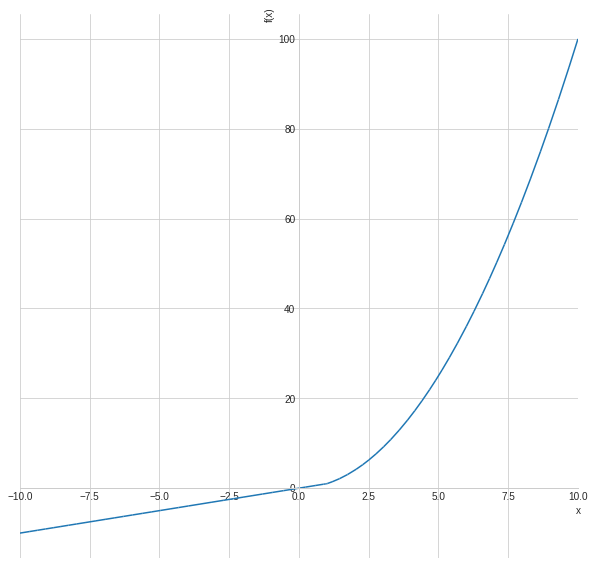

'En $x_0=1$ hay límite y f(1)=1'

$$f(x)=\begin{cases} x & \text{for}\: x < 1 \\x^{2} & \text{otherwise} \end{cases}$$ $ \rightarrow $Singularidades de las expresiones analíticas: $\emptyset$.\\ Posibles discontinuidades en los extremos de los trozos:1.\\En 1 es continua ya que hay límite y $\lim = f(1)=1$

'En 1 no existe límite. Límites laterales: E y  0'

'Esto es:Piecewise((exp(x), x < 1), (log(x), True))'

ValueError: math domain error

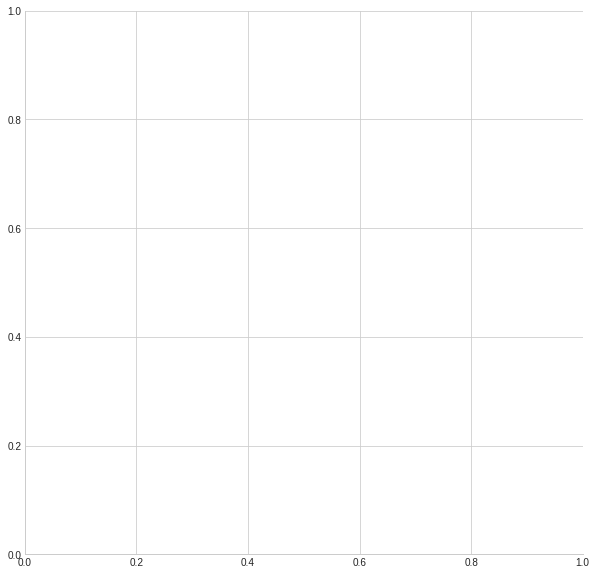

In [11]:
puntuacion = '1'                          
                      
datos =  [  
            Piecewise((x,x<1),(x**2,x>=1)),        
            Piecewise((E**x,x<1),(log(x),True)),
            Piecewise((1/x,x<1),(x**2-1,True)),
            Piecewise((abs(x+2),x<-1),(x**2,x<1), (2*x+1,x>1)),    
         ]
        

# vectores iniciales correspondientes al texto del enunciado

n_ejercicio = 'p076e14: '
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Estudia la continuidad de las siguientes funciones:
"""

display(md("**"+texto_ejercicio+"**"))

for j, t in enumerate(datos):
    enunciado_latex.append(r'$$f(x)='+latex(t)+r'$$')
    enunciado.append(t)
    sol = estudio(t)
    plt.rcParams['figure.figsize'] = 10,10
    display("Esto es:"+str(t))
    plot(t)
    #p1 = plot(parse_latex(t),show=True, xlim=(-10,10), ylim=(-10,10))
    #p1.save(n_ejercicio+"-"+str(j)+".png")
    #sol+=r"\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % (n_ejercicio+"-"+str(j))

    #solucion.append(sol)
    solucion.append(estudio(t))
    display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)




In [7]:
puntuacion = '1'                          
                      
datos =  [  
            Piecewise((x+1,x<=2),(k-x,True)),
            Piecewise((x+k,x<=0),(x**2-1,True)),
            Piecewise(((x**4-1)/(x-1),x<1),(k,x<=1),((x**4-1)/(x-1),True)),
            Piecewise(((sqrt(x)-1)/(x-1),x<=1),(k,True)),
            
            
         ]
        

# vectores iniciales correspondientes al texto del enunciado

n_ejercicio = 'p076e15: '
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Calcula el valor de k para que las siguientes funciones sean continuas:
"""

display(md("**"+texto_ejercicio+"**"))

for j, t in enumerate(datos):
    enunciado_latex.append(r'$$f(x)='+latex(t)+r'$$')
    enunciado.append(t)
    sol = solveset(trozos(t)[0][1]-trozos(t)[0][2],k)
    solucion.append(r"$"+latex(sol)+r"$")
    display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)




**Calcula el valor de k para que las siguientes funciones sean continuas:
**

$$f(x)=\begin{cases} x + 1 & \text{for}\: x \leq 2 \\k - x & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{5\right\}$

$$f(x)=\begin{cases} k + x & \text{for}\: x \leq 0 \\x^{2} - 1 & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{-1\right\}$

$$f(x)=\begin{cases} \frac{x^{4} - 1}{x - 1} & \text{for}\: x < 1 \\k & \text{for}\: x \leq 1 \\\frac{x^{4} - 1}{x - 1} & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{4\right\}$

$$f(x)=\begin{cases} \frac{\sqrt{x} - 1}{x - 1} & \text{for}\: x \leq 1 \\k & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{\frac{1}{2}\right\}$

In [8]:
puntuacion = '1'                          
                      
datos =  [  
            Piecewise((x**2,x<0),(a*x+b,x<1),(2,True)),
            Piecewise((a*(x-1)**2,x<0),(sin(b+x),x<pi),(pi/x,True)),
            
            
         ]
        


n_ejercicio = 'p076e16: '
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Halla a y b de modo que las siguientes funciones sean continuas:
"""

display(md("**"+texto_ejercicio+"**"))

for j, t in enumerate(datos):
    enunciado_latex.append(r'$$f(x)='+latex(t)+r'$$')
    enunciado.append(t)
    sol = solve([trozos(t)[0][1]-trozos(t)[0][2],trozos(t)[1][1]-trozos(t)[1][2]])
    solucion.append(r"$"+latex(sol)+r"$")
    display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))
    
dato = Piecewise((log(x),x<1),(a*x**2+b,True))
enunciado_latex.append(r'$$f(x)='+latex(dato)+r'$$')
enunciado.append(dato)
sol = solveset(trozos(dato)[0][1]-trozos(dato)[0][2],a)
solucion.append(r"$"+latex(sol)+r"$")
    


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)




**Halla a y b de modo que las siguientes funciones sean continuas:
**

$$f(x)=\begin{cases} x^{2} & \text{for}\: x < 0 \\a x + b & \text{for}\: x < 1 \\2 & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{ a : 2, \  b : 0\right\}$

$$f(x)=\begin{cases} a \left(x - 1\right)^{2} & \text{for}\: x < 0 \\\sin{\left(b + x \right)} & \text{for}\: x < \pi \\\frac{\pi}{x} & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left[ \left\{ a : -1, \  b : - \frac{\pi}{2}\right\}, \  \left\{ a : -1, \  b : \frac{3 \pi}{2}\right\}\right]$

In [9]:
df_ejercicios

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,$$f(x)=\frac{x + 1}{x^{2} + 1}$$,(x + 1)/(x**2 + 1),$$\mathbb{R}$$,Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
1,$$f(x)=\frac{2 x - 1}{2 x^{2} - 5 x + 2}$$,(2*x - 1)/(2*x**2 - 5*x + 2),"$$\left(-\infty, \frac{1}{2}\right) \cup \left...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
2,$$f(x)=\frac{x - 1}{x^{4} - 3 x^{3} + 6 x - 4}$$,(x - 1)/(x**4 - 3*x**3 + 6*x - 4),"$$\left(-\infty, - \sqrt{2}\right) \cup \left(...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
3,$$f(x)=\sqrt{2 x^{2} - 5 x + 2}$$,sqrt(2*x**2 - 5*x + 2),"$$\left(-\infty, \frac{1}{2}\right] \cup \left...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
4,$$f(x)=\sqrt{\frac{x + 1}{x - 3}}$$,sqrt((x + 1)/(x - 3)),"$$\left(-\infty, -1\right] \cup \left(3, \inft...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
5,$$f(x)=\frac{2}{\left|{x}\right| - 2}$$,2/(Abs(x) - 2),"$$\left(-\infty, -2\right) \cup \left(-2, 2\ri...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
6,$$f(x)=\frac{2}{\left|{x - 2}\right| - 2}$$,2/(Abs(x - 2) - 2),"$$\left(-\infty, 0\right) \cup \left(0, 4\righ...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
7,$$f(x)=x e^{x^{2}}$$,x*exp(x**2),$$\mathbb{R}$$,Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
8,$$f(x)=\begin{cases} e^{x} & \text{for}\: x < ...,"Piecewise((exp(x), x < 1), (log(x), True))",Singularidades de las expresiones analíticas: ...,Estudia la continuidad de las siguientes funci...,1BC,Continuidad,p076e14:,5,1,1,False,False
9,$$f(x)=\begin{cases} \frac{1}{x} & \text{for}\...,"Piecewise((1/x, x < 1), (x**2 - 1, True))",Singularidades de las expresiones analíticas: ...,Estudia la continuidad de las siguientes funci...,1BC,Continuidad,p076e14:,5,1,1,False,False


In [10]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p076e10: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,$$f(x)=\frac{x + 1}{x^{2} + 1}$$,(x + 1)/(x**2 + 1),$$\mathbb{R}$$,Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
1,$$f(x)=\frac{2 x - 1}{2 x^{2} - 5 x + 2}$$,(2*x - 1)/(2*x**2 - 5*x + 2),"$$\left(-\infty, \frac{1}{2}\right) \cup \left...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
2,$$f(x)=\frac{x - 1}{x^{4} - 3 x^{3} + 6 x - 4}$$,(x - 1)/(x**4 - 3*x**3 + 6*x - 4),"$$\left(-\infty, - \sqrt{2}\right) \cup \left(...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
3,$$f(x)=\sqrt{2 x^{2} - 5 x + 2}$$,sqrt(2*x**2 - 5*x + 2),"$$\left(-\infty, \frac{1}{2}\right] \cup \left...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
4,$$f(x)=\sqrt{\frac{x + 1}{x - 3}}$$,sqrt((x + 1)/(x - 3)),"$$\left(-\infty, -1\right] \cup \left(3, \inft...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
5,$$f(x)=\frac{2}{\left|{x}\right| - 2}$$,2/(Abs(x) - 2),"$$\left(-\infty, -2\right) \cup \left(-2, 2\ri...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
6,$$f(x)=\frac{2}{\left|{x - 2}\right| - 2}$$,2/(Abs(x - 2) - 2),"$$\left(-\infty, 0\right) \cup \left(0, 4\righ...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
7,$$f(x)=x e^{x^{2}}$$,x*exp(x**2),$$\mathbb{R}$$,Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False


**Ejercicio: **p076e14: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
8,$$f(x)=\begin{cases} e^{x} & \text{for}\: x < ...,"Piecewise((exp(x), x < 1), (log(x), True))",Singularidades de las expresiones analíticas: ...,Estudia la continuidad de las siguientes funci...,1BC,Continuidad,p076e14:,5,1,1,False,False
9,$$f(x)=\begin{cases} \frac{1}{x} & \text{for}\...,"Piecewise((1/x, x < 1), (x**2 - 1, True))",Singularidades de las expresiones analíticas: ...,Estudia la continuidad de las siguientes funci...,1BC,Continuidad,p076e14:,5,1,1,False,False
10,$$f(x)=\begin{cases} \left|{x + 2}\right| & \t...,"Piecewise((Abs(x + 2), x < -1), (x**2, x < 1),...",Singularidades de las expresiones analíticas: ...,Estudia la continuidad de las siguientes funci...,1BC,Continuidad,p076e14:,5,1,1,False,False


**Ejercicio: **p076e15: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
11,$$f(x)=\begin{cases} x + 1 & \text{for}\: x \l...,"Piecewise((x + 1, x <= 2), (k - x, True))",$\left\{5\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Continuidad,p076e15:,5,1,1,False,False
12,$$f(x)=\begin{cases} k + x & \text{for}\: x \l...,"Piecewise((k + x, x <= 0), (x**2 - 1, True))",$\left\{-1\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Continuidad,p076e15:,5,1,1,False,False
13,$$f(x)=\begin{cases} \frac{x^{4} - 1}{x - 1} &...,"Piecewise(((x**4 - 1)/(x - 1), x < 1), (k, x <...",$\left\{4\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Continuidad,p076e15:,5,1,1,False,False
14,$$f(x)=\begin{cases} \frac{\sqrt{x} - 1}{x - 1...,"Piecewise(((sqrt(x) - 1)/(x - 1), x <= 1), (k,...",$\left\{\frac{1}{2}\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Continuidad,p076e15:,5,1,1,False,False


**Ejercicio: **p076e16: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
15,$$f(x)=\begin{cases} x^{2} & \text{for}\: x < ...,"Piecewise((x**2, x < 0), (a*x + b, x < 1), (2,...","$\left\{ a : 2, \ b : 0\right\}$",Halla a y b de modo que las siguientes funcion...,1BC,Continuidad,p076e16:,5,1,1,False,False
16,$$f(x)=\begin{cases} a \left(x - 1\right)^{2} ...,"Piecewise((a*(x - 1)**2, x < 0), (sin(b + x), ...","$\left[ \left\{ a : -1, \ b : - \frac{\pi}{2}...",Halla a y b de modo que las siguientes funcion...,1BC,Continuidad,p076e16:,5,1,1,False,False
17,$$f(x)=\begin{cases} \log{\left(x \right)} & \...,"Piecewise((log(x), x < 1), (a*x**2 + b, True))",$\left\{- b\right\}$,Halla a y b de modo que las siguientes funcion...,1BC,Continuidad,p076e16:,5,1,1,False,False


In [11]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p076e10: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,$$f(x)=\frac{x + 1}{x^{2} + 1}$$,(x + 1)/(x**2 + 1),$$\mathbb{R}$$,Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
1,$$f(x)=\frac{2 x - 1}{2 x^{2} - 5 x + 2}$$,(2*x - 1)/(2*x**2 - 5*x + 2),"$$\left(-\infty, \frac{1}{2}\right) \cup \left...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
2,$$f(x)=\frac{x - 1}{x^{4} - 3 x^{3} + 6 x - 4}$$,(x - 1)/(x**4 - 3*x**3 + 6*x - 4),"$$\left(-\infty, - \sqrt{2}\right) \cup \left(...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
3,$$f(x)=\sqrt{2 x^{2} - 5 x + 2}$$,sqrt(2*x**2 - 5*x + 2),"$$\left(-\infty, \frac{1}{2}\right] \cup \left...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
4,$$f(x)=\sqrt{\frac{x + 1}{x - 3}}$$,sqrt((x + 1)/(x - 3)),"$$\left(-\infty, -1\right] \cup \left(3, \inft...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
5,$$f(x)=\frac{2}{\left|{x}\right| - 2}$$,2/(Abs(x) - 2),"$$\left(-\infty, -2\right) \cup \left(-2, 2\ri...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
6,$$f(x)=\frac{2}{\left|{x - 2}\right| - 2}$$,2/(Abs(x - 2) - 2),"$$\left(-\infty, 0\right) \cup \left(0, 4\righ...",Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False
7,$$f(x)=x e^{x^{2}}$$,x*exp(x**2),$$\mathbb{R}$$,Hallar el dominio de continuidad de las siguie...,1BC,Continuidad,p076e10:,5,1,1,False,False


**Ejercicio: **p076e14: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
8,$$f(x)=\begin{cases} e^{x} & \text{for}\: x < ...,"Piecewise((exp(x), x < 1), (log(x), True))",Singularidades de las expresiones analíticas: ...,Estudia la continuidad de las siguientes funci...,1BC,Continuidad,p076e14:,5,1,1,False,False
9,$$f(x)=\begin{cases} \frac{1}{x} & \text{for}\...,"Piecewise((1/x, x < 1), (x**2 - 1, True))",Singularidades de las expresiones analíticas: ...,Estudia la continuidad de las siguientes funci...,1BC,Continuidad,p076e14:,5,1,1,False,False
10,$$f(x)=\begin{cases} \left|{x + 2}\right| & \t...,"Piecewise((Abs(x + 2), x < -1), (x**2, x < 1),...",Singularidades de las expresiones analíticas: ...,Estudia la continuidad de las siguientes funci...,1BC,Continuidad,p076e14:,5,1,1,False,False


**Ejercicio: **p076e15: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
11,$$f(x)=\begin{cases} x + 1 & \text{for}\: x \l...,"Piecewise((x + 1, x <= 2), (k - x, True))",$\left\{5\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Continuidad,p076e15:,5,1,1,False,False
12,$$f(x)=\begin{cases} k + x & \text{for}\: x \l...,"Piecewise((k + x, x <= 0), (x**2 - 1, True))",$\left\{-1\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Continuidad,p076e15:,5,1,1,False,False
13,$$f(x)=\begin{cases} \frac{x^{4} - 1}{x - 1} &...,"Piecewise(((x**4 - 1)/(x - 1), x < 1), (k, x <...",$\left\{4\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Continuidad,p076e15:,5,1,1,False,False
14,$$f(x)=\begin{cases} \frac{\sqrt{x} - 1}{x - 1...,"Piecewise(((sqrt(x) - 1)/(x - 1), x <= 1), (k,...",$\left\{\frac{1}{2}\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Continuidad,p076e15:,5,1,1,False,False


**Ejercicio: **p076e16: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
15,$$f(x)=\begin{cases} x^{2} & \text{for}\: x < ...,"Piecewise((x**2, x < 0), (a*x + b, x < 1), (2,...","$\left\{ a : 2, \ b : 0\right\}$",Halla a y b de modo que las siguientes funcion...,1BC,Continuidad,p076e16:,5,1,1,False,False
16,$$f(x)=\begin{cases} a \left(x - 1\right)^{2} ...,"Piecewise((a*(x - 1)**2, x < 0), (sin(b + x), ...","$\left[ \left\{ a : -1, \ b : - \frac{\pi}{2}...",Halla a y b de modo que las siguientes funcion...,1BC,Continuidad,p076e16:,5,1,1,False,False
17,$$f(x)=\begin{cases} \log{\left(x \right)} & \...,"Piecewise((log(x), x < 1), (a*x**2 + b, True))",$\left\{- b\right\}$,Halla a y b de modo que las siguientes funcion...,1BC,Continuidad,p076e16:,5,1,1,False,False
